<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/10-hierarchical-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns


## Blobs Data

In [2]:
# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.5)

# Convert to DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2'])
df.head()

,X1,X2
0,-8.149818,-9.152380
1,5.860155,0.126873
2,-3.213409,9.828126
3,6.744070,-0.129607
4,-6.342946,-6.038933


## Visualizing the Data
Let's plot the generated data to see its structure.

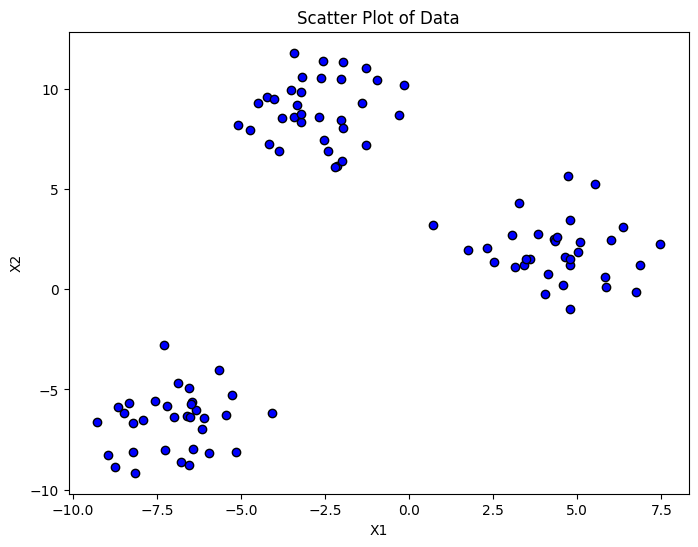

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(df['X1'], df['X2'], c='blue', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Data')
plt.show()

## Creating a Dendrogram
A dendrogram helps visualize the hierarchical clustering process.

In [4]:
# Creat Linkage:
linkage = sch.linkage(df, method='ward')

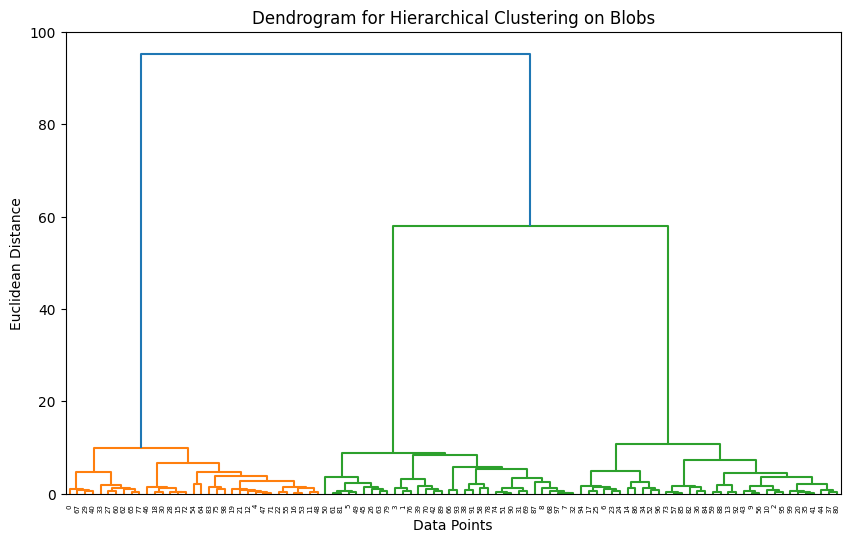

In [6]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linkage)
plt.title('Dendrogram for Hierarchical Clustering on Blobs')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

## Performing Hierarchical Clustering
Now, we'll apply Agglomerative Clustering to form clusters.

In [7]:
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_clusters = hc.fit_predict(X)

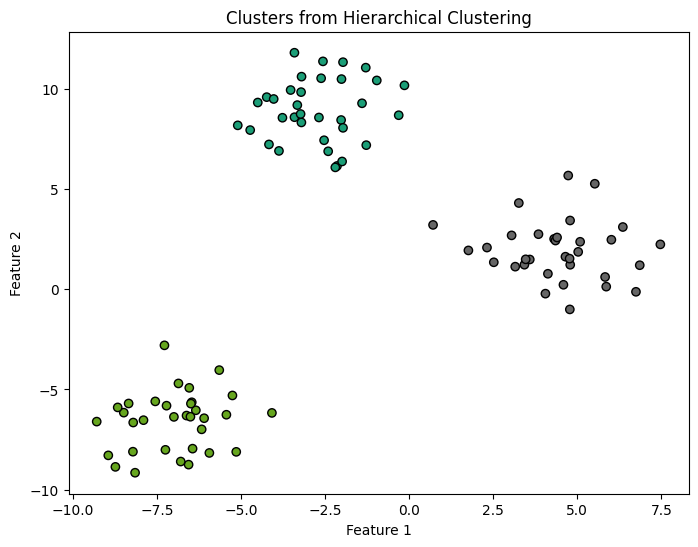

In [8]:
# Plot with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['X2'], c = y_clusters, cmap = 'Dark2', edgecolors = 'k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from Hierarchical Clustering')
plt.show()

## Classification Data

In [9]:
# Generate synthetic classification data
X, y = make_classification(n_samples = 500, n_features = 4,
                           n_informative = 2, n_redundant = 0, random_state = 42)

df_class = pd.DataFrame(X, columns=[f'X{i}' for i in range(1, X.shape[1] + 1)])
df_class['Target'] = y
df_class.head()

,X1,X2,X3,X4,Target
0,-0.548725,0.092845,1.967203,-0.238536,1
1,-1.581191,0.895038,0.965919,1.041327,1
2,0.950308,1.710613,0.441065,-1.870141,0
3,1.056057,0.223239,0.810288,1.163446,1
4,0.168655,0.441941,1.916205,0.476653,1


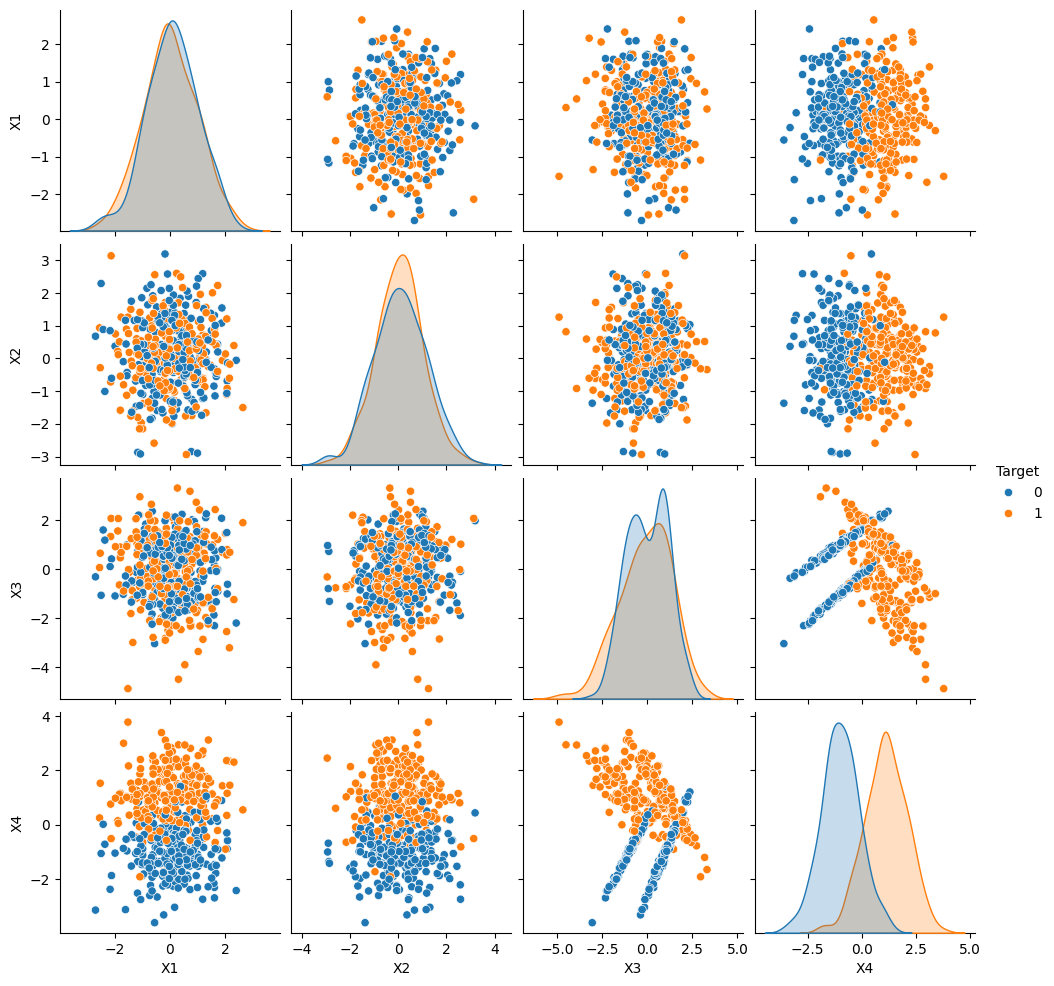

In [16]:
sns.pairplot(df_class, hue='Target', diag_kind='kde')

Descriptions of linkage algorithms available here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

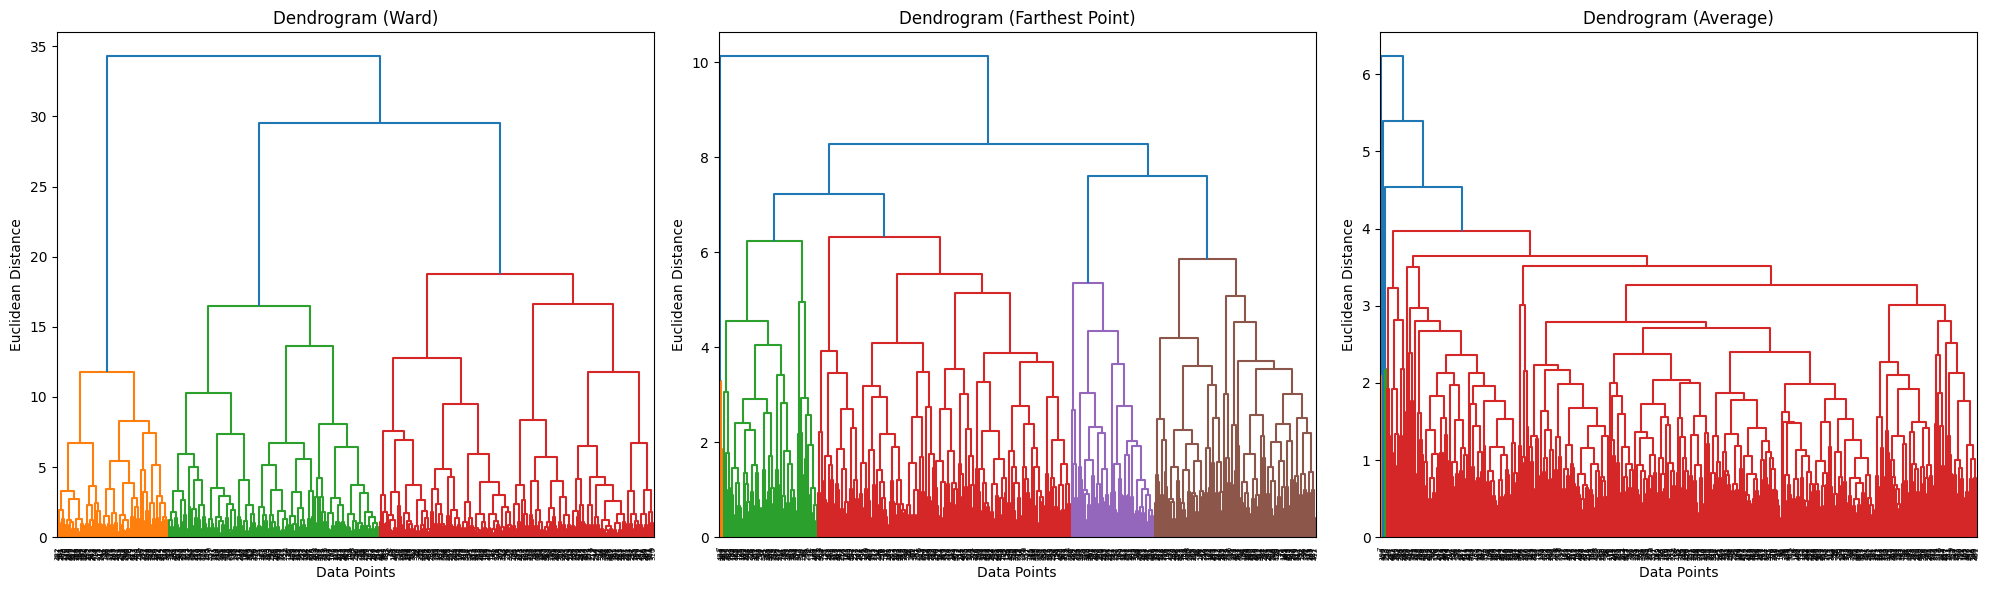

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Ward linkage
axes[0].set_title('Dendrogram (Ward)')
sch.dendrogram(sch.linkage(X, method='ward'), ax=axes[0])
axes[0].set_xlabel('Data Points')
axes[0].set_ylabel('Euclidean Distance')

# Complete linkage
axes[1].set_title('Dendrogram (Farthest Point)')
sch.dendrogram(sch.linkage(X, method='complete'), ax=axes[1])
axes[1].set_xlabel('Data Points')
axes[1].set_ylabel('Euclidean Distance')

# Single linkage
axes[2].set_title('Dendrogram (Average)')
sch.dendrogram(sch.linkage(X, method='average'), ax=axes[2])
axes[2].set_xlabel('Data Points')
axes[2].set_ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

In [11]:
# Fit HC
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_clusters = hc.fit_predict(X)

<Axes: xlabel='X3', ylabel='X4'>

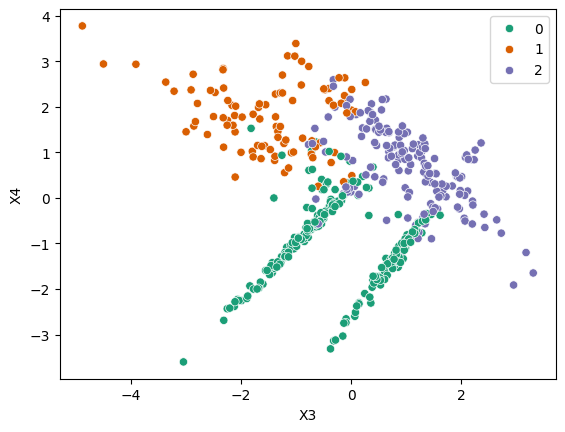

In [12]:
sns.scatterplot(x = 'X3', y = 'X4', hue = y_clusters, data = df_class, palette = 'Dark2')

## Moons data

In [13]:
X, y = make_moons(n_samples = 500, noise=0.1, random_state=42)
df_moons = pd.DataFrame(X, columns=['X1', 'X2'])
df_moons['Target'] = y


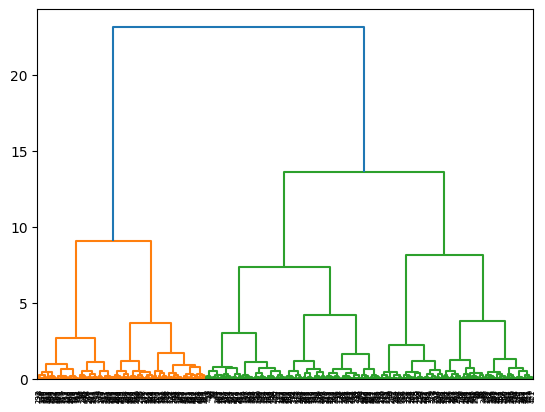

In [14]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [15]:
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage='ward')
y_clusters = hc.fit_predict(X)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data = df_moons, x = 'X1', y = 'X2', hue = y_clusters, palette = 'rainbow', ax = ax[0])
sns.scatterplot(data = df_moons, x = 'X1', y = 'X2', hue = 'Target', palette = 'rainbow', ax = ax[1])